In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
# Gets the cropped player image
image_path = ('../output/img/cropped_player.jpg')
image = cv2.imread(image_path) # imports the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts the image to RGB


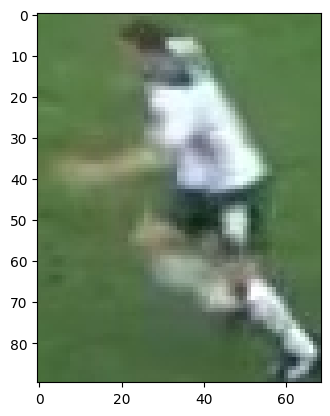

In [4]:
 # Look at the cropped image of the player
plt.imshow(image)
plt.show()

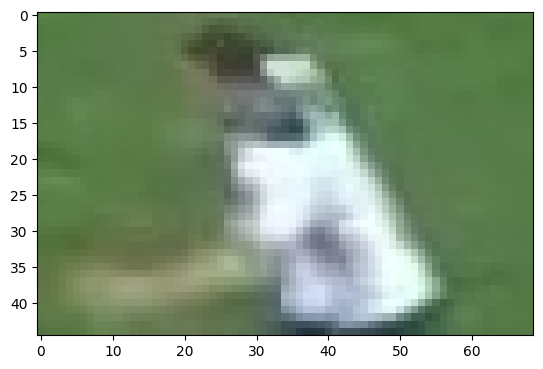

In [5]:
# we want to base our assesments of the uniform based on their kit shirt color
# so we want to crop jkust the shirt of the player

# note: image.shape[0] is the height of the image
# note: image.shape[1] is the width of the image

player_shirt = image[0: int(image.shape[0]/2), 0:100]
plt.imshow(player_shirt)
plt.show()


# Color Clustering 
using clustering to identify the dominatn colors and assess the color of the kit using kmeans

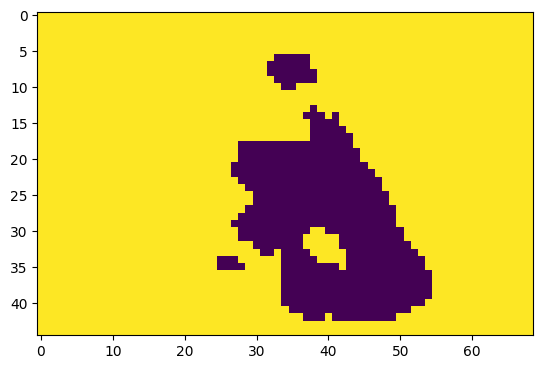

In [ ]:

# Reshape the image into a 2d array
player_shirt_image_2d = player_shirt.reshape(-1, 3)

# do kmenas with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(player_shirt_image_2d)

# get the cluster labels
cluster_labels = kmeans.labels_

# reshape the cluster labels to the shape of the image
cluster_labels = cluster_labels.reshape(player_shirt.shape[0], player_shirt.shape[1])

# display the results
plt.imshow(cluster_labels, cmap='viridis')
plt.show()

# * player shirt will be in purple, background will be in yellow

In [13]:
# since most of our images are in the same format - the middle of the bbox being the player, using the corner clusters of the image could be a good way to determine the player shirt color - since the player shirt will be the other cluster color
corner_clusters = [cluster_labels[0, 0], cluster_labels[0, -1], cluster_labels[-1, 0], cluster_labels[-1, -1]]

# most common cluster in the corners will be the non player cluster
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [ ]:
# the player cluster will be the other cluster
player_clusters = 1 - non_player_cluster
print(player_clusters)

0


In [ ]:

# The RGB values of the player cluster - the player shirt color
kmeans.cluster_centers_[player_clusters]

array([199.71238095, 214.86666667, 218.35238095])